# Combining All the Datasets

After extracting all the posts related to the wallstreetbets subreddit, we will combine all collected data into one dataframe, so we can prefrom our cleaning and features selection

In [3]:
import pandas as pd
import nltk
from nltk import word_tokenize
import re
import string
from collections import Counter
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader.data as web
%matplotlib inline

In [251]:
df1= pd.read_csv('C:/Users/Makram/Desktop/New Folder/reddit_wsb_full_Jan.csv')

In [252]:
df2= pd.read_csv('C:/Users/Makram/Desktop/New Folder/reddit1_wsb_full_feb.csv')

In [253]:
df1.head()

,Unnamed: 0,title,score,id,num_comments,date,url
0,0,PROUD OF YOU ALL.,1,l8wv1u,0,2021-01-30,https://www.reddit.com/r/wallstreetbets/commen...
1,1,Ok so why are you retards so divided I need an...,1,l8wv0r,0,2021-01-30,https://www.reddit.com/r/wallstreetbets/commen...
2,2,"How to Give Smart; or, How to not waste your m...",1,l8wuzj,47,2021-01-30,https://www.reddit.com/r/wallstreetbets/commen...
3,3,Buy GME stock?,1,l8wuz0,0,2021-01-30,https://www.reddit.com/r/wallstreetbets/commen...
4,4,Prepare for Monday's battle,1,l8wuym,0,2021-01-30,https://i.redd.it/1oe5akkwkje61.png


In [254]:
df2.head()

,Unnamed: 0,index,Unnamed: 0.1,title,score,id,num_comments,date,url
0,0,419731,32591,$CBAT $SUNW $SPI $OXBR Y'all are missing the p...,4,j1fmmo,11,2020-09-29,https://www.reddit.com/r/wallstreetbets/commen...
1,1,387627,487,Robinhood,7,l6x020,2,2021-01-28,https://www.reddit.com/r/wallstreetbets/commen...
2,2,387229,89,Letter to your national financial regulatory a...,314,l6r7fv,101,2021-01-28,https://www.reddit.com/r/wallstreetbets/commen...
3,3,387228,88,Politics can't stop GME and math says PT 1000+,1260,l6ra26,248,2021-01-28,https://www.reddit.com/r/wallstreetbets/commen...
4,4,387227,87,WSB have made the front page of the Financial ...,917,l6rewy,116,2021-01-28,https://i.redd.it/9sbup2lu51e61.jpg


In [255]:
data=pd.concat([df1,df2], ignore_index=True,axis=0)

In [256]:
data.head()

,Unnamed: 0,title,score,id,num_comments,date,url,index,Unnamed: 0.1
0,0,PROUD OF YOU ALL.,1,l8wv1u,0,2021-01-30,https://www.reddit.com/r/wallstreetbets/commen...,NaN,NaN
1,1,Ok so why are you retards so divided I need an...,1,l8wv0r,0,2021-01-30,https://www.reddit.com/r/wallstreetbets/commen...,NaN,NaN
2,2,"How to Give Smart; or, How to not waste your m...",1,l8wuzj,47,2021-01-30,https://www.reddit.com/r/wallstreetbets/commen...,NaN,NaN
3,3,Buy GME stock?,1,l8wuz0,0,2021-01-30,https://www.reddit.com/r/wallstreetbets/commen...,NaN,NaN
4,4,Prepare for Monday's battle,1,l8wuym,0,2021-01-30,https://i.redd.it/1oe5akkwkje61.png,NaN,NaN


In [257]:
data.shape

(863497, 9)

In [258]:
data.tail(10)

,Unnamed: 0,title,score,id,num_comments,date,url,index,Unnamed: 0.1
863487,421189,40 k loss in 2 weeks. Started with 8k. Arkg op...,2,lu3s2n,2,2021-02-28,https://i.redd.it/3wdoaf21w4k61.jpg,280.0,280.0
863488,421190,News and updates on the people’s coin,1,lu3rav,1,2021-02-28,https://www.reddit.com/r/wallstreetbets/commen...,281.0,281.0
863489,421191,I will tattoo WSB on my c*ock if PLTR hits 1k....,2,lu3r38,0,2021-02-28,https://www.reddit.com/r/wallstreetbets/commen...,282.0,282.0
863490,421192,Eh..,1,lu3quq,0,2021-02-28,https://i.redd.it/unfhpepfv4k61.png,283.0,283.0
863491,421193,The real asset class,1,lu3qss,0,2021-02-28,https://i.redd.it/kiuhep2nv4k61.jpg,284.0,284.0
863492,421194,STAY STRONG APES. GONNA BE A ROCKY WEEK 💎 🙌 🦍,1,lu3pzt,0,2021-02-28,https://v.redd.it/l90n897bv4k61,285.0,285.0
863493,421195,Going Full Retard,1,lu3poe,0,2021-02-28,https://www.reddit.com/r/wallstreetbets/commen...,286.0,286.0
863494,421196,Great research produces great results.,1,lu3pmn,0,2021-02-28,https://www.reddit.com/r/wallstreetbets/commen...,287.0,287.0
863495,421197,Cannot invest in US Stocks but on 3 Feb this i...,2,lu3t9o,0,2021-02-28,https://i.redd.it/ac1jiflbw4k61.jpg,278.0,278.0
863496,421198,You all should try to SPAC Jeremy Fragrance's ...,1,lu7n6l,0,2021-02-28,https://v.redd.it/6enw7vxzl5k61,0.0,0.0


In [259]:
data['date'] = pd.to_datetime(data['date'], utc=True).dt.date
data["date"] = data["date"].astype('datetime64')

In [260]:
data.date.dtype

dtype('<M8[ns]')

In [261]:
data.tail(10)

,Unnamed: 0,title,score,id,num_comments,date,url,index,Unnamed: 0.1
863487,421189,40 k loss in 2 weeks. Started with 8k. Arkg op...,2,lu3s2n,2,2021-02-28,https://i.redd.it/3wdoaf21w4k61.jpg,280.0,280.0
863488,421190,News and updates on the people’s coin,1,lu3rav,1,2021-02-28,https://www.reddit.com/r/wallstreetbets/commen...,281.0,281.0
863489,421191,I will tattoo WSB on my c*ock if PLTR hits 1k....,2,lu3r38,0,2021-02-28,https://www.reddit.com/r/wallstreetbets/commen...,282.0,282.0
863490,421192,Eh..,1,lu3quq,0,2021-02-28,https://i.redd.it/unfhpepfv4k61.png,283.0,283.0
863491,421193,The real asset class,1,lu3qss,0,2021-02-28,https://i.redd.it/kiuhep2nv4k61.jpg,284.0,284.0
863492,421194,STAY STRONG APES. GONNA BE A ROCKY WEEK 💎 🙌 🦍,1,lu3pzt,0,2021-02-28,https://v.redd.it/l90n897bv4k61,285.0,285.0
863493,421195,Going Full Retard,1,lu3poe,0,2021-02-28,https://www.reddit.com/r/wallstreetbets/commen...,286.0,286.0
863494,421196,Great research produces great results.,1,lu3pmn,0,2021-02-28,https://www.reddit.com/r/wallstreetbets/commen...,287.0,287.0
863495,421197,Cannot invest in US Stocks but on 3 Feb this i...,2,lu3t9o,0,2021-02-28,https://i.redd.it/ac1jiflbw4k61.jpg,278.0,278.0
863496,421198,You all should try to SPAC Jeremy Fragrance's ...,1,lu7n6l,0,2021-02-28,https://v.redd.it/6enw7vxzl5k61,0.0,0.0


In [262]:
data.columns

Index(['Unnamed: 0', 'title', 'score', 'id', 'num_comments', 'date', 'url',
       'index', 'Unnamed: 0.1'],
      dtype='object')

In [263]:
data.shape

(863497, 9)

In [264]:
data=data.sort_values(by='date', ascending=True).reset_index(inplace=False)

In [265]:
data

,level_0,Unnamed: 0,title,score,id,num_comments,date,url,index,Unnamed: 0.1
0,442298,0,$CBAT $SUNW $SPI $OXBR Y'all are missing the p...,4,j1fmmo,11,2020-09-29,https://www.reddit.com/r/wallstreetbets/commen...,419731.0,32591.0
1,442260,442260,"Here's how much investing $1,000...",1,knzn0p,3,2020-12-31,https://i.redd.it/lxl6iz12ol861.png,NaN,NaN
2,442281,442281,Can anyone tell me why robinhood is saying plt...,1,knzb2r,45,2020-12-31,https://www.reddit.com/gallery/knzb2r,NaN,NaN
3,442280,442280,https://www.bloomberg.com/news/articles/2020-1...,1,knzbm6,4,2020-12-31,https://i.redd.it/sfgxvfzskl861.jpg,NaN,NaN
4,442279,442279,$MRNA 🚀🚀🚀,1,knzbq9,24,2020-12-31,https://i.redd.it/quly912ukl861.jpg,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
863492,862981,420683,My sbe call option changed to chpt (charge poi...,0,lu0zvq,0,2021-02-28,https://www.reddit.com/gallery/lu0zvq,709.0,709.0
863493,862982,420684,It was meant to be. After we get our tendies w...,1,lu0ufl,0,2021-02-28,https://i.redd.it/t90zukr624k61.jpg,732.0,732.0
863494,862983,420685,Does Robinhood CEO have a pic of dog c going t...,1,lu0u2n,0,2021-02-28,https://i.redd.it/5tekp55324k61.jpg,733.0,733.0
863495,862961,420663,Slack $WORK is becoming ubiquitous in business,0,lu0zxr,9,2021-02-28,https://www.reddit.com/r/wallstreetbets/commen...,708.0,708.0


In [266]:
data = data.drop(['Unnamed: 0','index','level_0','Unnamed: 0.1'],axis=1)

In [267]:
data.isna().sum()

title           1
score           0
id              0
num_comments    0
date            0
url             0
dtype: int64

In [268]:
data=data.dropna()

In [269]:
data.head

<bound method NDFrame.head of                                                     title  score      id  \
0       $CBAT $SUNW $SPI $OXBR Y'all are missing the p...      4  j1fmmo   
1                     Here's how much investing $1,000...      1  knzn0p   
2       Can anyone tell me why robinhood is saying plt...      1  knzb2r   
3       https://www.bloomberg.com/news/articles/2020-1...      1  knzbm6   
4                                               $MRNA 🚀🚀🚀      1  knzbq9   
...                                                   ...    ...     ...   
863492  My sbe call option changed to chpt (charge poi...      0  lu0zvq   
863493  It was meant to be. After we get our tendies w...      1  lu0ufl   
863494  Does Robinhood CEO have a pic of dog c going t...      1  lu0u2n   
863495     Slack $WORK is becoming ubiquitous in business      0  lu0zxr   
863496  You all should try to SPAC Jeremy Fragrance's ...      1  lu7n6l   

        num_comments       date  \
0                 11 2

In [270]:
data.dtypes

title                   object
score                    int64
id                      object
num_comments             int64
date            datetime64[ns]
url                     object
dtype: object

In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863496 entries, 0 to 863496
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   title         863496 non-null  object        
 1   score         863496 non-null  int64         
 2   id            863496 non-null  object        
 3   num_comments  863496 non-null  int64         
 4   date          863496 non-null  datetime64[ns]
 5   url           863496 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 46.1+ MB


In [272]:
data.to_csv('C:/Users/Makram/Desktop/New folder/reddit_data.csv')

# REDDIT DATA

After scraping all posts under Wallstreetbets subreddit for the months January and February 2021 and combined them into one file, we will begin now the process of cleaning the data and preparing it for further analysis later on

In [4]:
reddit= pd.read_csv('C:/Users/Makram/Desktop/New Folder/reddit_data.csv')

In [5]:
reddit

,Unnamed: 0,title,score,id,num_comments,date,url
0,0,$CBAT $SUNW $SPI $OXBR Y'all are missing the p...,4,j1fmmo,11,2020-09-29,https://www.reddit.com/r/wallstreetbets/commen...
1,1,"Here's how much investing $1,000...",1,knzn0p,3,2020-12-31,https://i.redd.it/lxl6iz12ol861.png
2,2,Can anyone tell me why robinhood is saying plt...,1,knzb2r,45,2020-12-31,https://www.reddit.com/gallery/knzb2r
3,3,https://www.bloomberg.com/news/articles/2020-1...,1,knzbm6,4,2020-12-31,https://i.redd.it/sfgxvfzskl861.jpg
4,4,$MRNA 🚀🚀🚀,1,knzbq9,24,2020-12-31,https://i.redd.it/quly912ukl861.jpg
...,...,...,...,...,...,...,...
863491,863492,Doing my small part by passing this along 💎,2,lu3p5u,0,2021-02-28,https://i.redd.it/tas5usm6v4k61.jpg
863492,863493,💎🔫 APES STIMULUS - LOCKED AND LOADED 🦍🚀,25308,lu3p20,404,2021-02-28,https://v.redd.it/fjnt1ghvu4k61
863493,863494,STAY STRONG APES THIS WEEK IS GONNA BE A BUMPY...,1,lu3ors,0,2021-02-28,https://v.redd.it/xqtbbc12v4k61
863494,863495,Affordable guide to trading. From A-Z,1,lu3oec,0,2021-02-28,https://beginnertradingbook.com


In [6]:
reddit = reddit[(reddit['date']> '2020-12-31')]

In [7]:
reddit.shape

(863393, 7)

In [8]:
reddit.tail(10)

,Unnamed: 0,title,score,id,num_comments,date,url
863486,863487,Going Full Retard,1,lu3poe,0,2021-02-28,https://www.reddit.com/r/wallstreetbets/commen...
863487,863488,Great research produces great results.,1,lu3pmn,0,2021-02-28,https://www.reddit.com/r/wallstreetbets/commen...
863488,863489,To the moon!,1,lu3pja,0,2021-02-28,https://i.redd.it/vrigcjcav4k61.jpg
863489,863490,GOOOOOOOOOD MORNINGGGG GMEEEEEEEEE,2,lu3p90,0,2021-02-28,https://v.redd.it/3bhmyueku4k61
863490,863491,A Reminder: Worst Case Scenario with AMC is a ...,19,lu3p87,1,2021-02-28,https://www.reddit.com/r/wallstreetbets/commen...
863491,863492,Doing my small part by passing this along 💎,2,lu3p5u,0,2021-02-28,https://i.redd.it/tas5usm6v4k61.jpg
863492,863493,💎🔫 APES STIMULUS - LOCKED AND LOADED 🦍🚀,25308,lu3p20,404,2021-02-28,https://v.redd.it/fjnt1ghvu4k61
863493,863494,STAY STRONG APES THIS WEEK IS GONNA BE A BUMPY...,1,lu3ors,0,2021-02-28,https://v.redd.it/xqtbbc12v4k61
863494,863495,Affordable guide to trading. From A-Z,1,lu3oec,0,2021-02-28,https://beginnertradingbook.com
863495,863496,Fun and Games Switching From Margin to Cash on ET,60,lu7g5l,21,2021-02-28,https://www.reddit.com/r/wallstreetbets/commen...


In [9]:
reddit.columns

Index(['Unnamed: 0', 'title', 'score', 'id', 'num_comments', 'date', 'url'], dtype='object')

In [10]:
reddit=reddit.drop(['Unnamed: 0'],axis=1)

In [11]:
reddit.shape

(863393, 6)

In [12]:
reddit.tail(10)

,title,score,id,num_comments,date,url
863486,Going Full Retard,1,lu3poe,0,2021-02-28,https://www.reddit.com/r/wallstreetbets/commen...
863487,Great research produces great results.,1,lu3pmn,0,2021-02-28,https://www.reddit.com/r/wallstreetbets/commen...
863488,To the moon!,1,lu3pja,0,2021-02-28,https://i.redd.it/vrigcjcav4k61.jpg
863489,GOOOOOOOOOD MORNINGGGG GMEEEEEEEEE,2,lu3p90,0,2021-02-28,https://v.redd.it/3bhmyueku4k61
863490,A Reminder: Worst Case Scenario with AMC is a ...,19,lu3p87,1,2021-02-28,https://www.reddit.com/r/wallstreetbets/commen...
863491,Doing my small part by passing this along 💎,2,lu3p5u,0,2021-02-28,https://i.redd.it/tas5usm6v4k61.jpg
863492,💎🔫 APES STIMULUS - LOCKED AND LOADED 🦍🚀,25308,lu3p20,404,2021-02-28,https://v.redd.it/fjnt1ghvu4k61
863493,STAY STRONG APES THIS WEEK IS GONNA BE A BUMPY...,1,lu3ors,0,2021-02-28,https://v.redd.it/xqtbbc12v4k61
863494,Affordable guide to trading. From A-Z,1,lu3oec,0,2021-02-28,https://beginnertradingbook.com
863495,Fun and Games Switching From Margin to Cash on ET,60,lu7g5l,21,2021-02-28,https://www.reddit.com/r/wallstreetbets/commen...


In [13]:
#reddit.to_csv('C:/Users/Makram/Desktop/305/reddit_cleaned.csv', index=False)

In [14]:
data = reddit

In [15]:
data.isna().sum()

title           0
score           0
id              0
num_comments    0
date            0
url             0
dtype: int64

In [16]:
data.dtypes

title           object
score            int64
id              object
num_comments     int64
date            object
url             object
dtype: object

In [17]:
data= data.rename(columns={'date':'Date'})

Before processing the data moving forward, we will first change the type of the date column into datetime64 and the title column into a string

In [18]:
data['Date'] = data['Date'].astype('datetime64')
data['title'] = data['title'].astype('str')
data.dtypes

title                   object
score                    int64
id                      object
num_comments             int64
Date            datetime64[ns]
url                     object
dtype: object

Secondly we will remove all the punctuations from the title column, lower case all the words and then do a word tokenization in order to separate the words in each post

In [19]:
string.punctuation
def remove_punct(data):
    data  = "".join([char for char in data if char not in string.punctuation])
    data = re.sub('[0-9]+', '', data)
    return data

data['title_lower'] = data['title'].apply(lambda x: remove_punct(x.lower()))
data.title_lower = data.title_lower.apply(lambda x: word_tokenize(x))

After separating the wordsinto tokens, we will now create a list of bullish terms that in the word of finance are related into calling for buying a certain and push it into its limits

In [20]:
bull_lst = ['gme', '🚀', '🚀🚀','🚀🚀🚀','yolo', 'gme','💎','$','rkt','rocket','gamestop']

In [21]:
data.drop(['title'],axis=1,inplace=True)

In [22]:
data

,score,id,num_comments,Date,url,title_lower
103,1,koca48,2,2021-01-01,https://www.reddit.com/r/wallstreetbets/commen...,"[why, pltr]"
104,1,kocb95,0,2021-01-01,https://v.redd.it/5cg2zjgzfq861,"[ok, but, really, what, else, am, i, supposed,..."
105,1,kogdw9,0,2021-01-01,https://www.reddit.com/r/wallstreetbets/commen...,"[very, shortly, i, will, be, coming, into, abo..."
106,1,kocb99,0,2021-01-01,https://v.redd.it/5f8drab6gq861,"[palantir, pltr, gang, stand, by, for, refuel,..."
107,1,kocbjg,4,2021-01-01,https://www.reddit.com/r/wallstreetbets/commen...,"[ok, just, got, my, irs, deposit]"
...,...,...,...,...,...,...
863491,2,lu3p5u,0,2021-02-28,https://i.redd.it/tas5usm6v4k61.jpg,"[doing, my, small, part, by, passing, this, al..."
863492,25308,lu3p20,404,2021-02-28,https://v.redd.it/fjnt1ghvu4k61,"[💎🔫, apes, stimulus, locked, and, loaded, 🦍🚀]"
863493,1,lu3ors,0,2021-02-28,https://v.redd.it/xqtbbc12v4k61,"[stay, strong, apes, this, week, is, gon, na, ..."
863494,1,lu3oec,0,2021-02-28,https://beginnertradingbook.com,"[affordable, guide, to, trading, from, az]"


In [23]:
data.rename(columns={'title_lower':'Tokens'}, inplace=True)

After that we will count how many times, each bullish word was spotted in each post title

In [24]:
def count_x(x, token_list):
    nb = 0
    for i in x:
        if i in token_list:
            nb += 1
    return nb

In [25]:
data['frequency_bullish'] = data.Tokens.apply(lambda x: count_x(x,bull_lst))

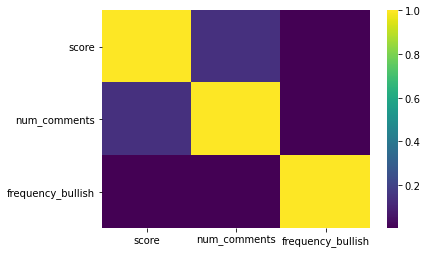

In [26]:
sns.heatmap(data.corr(),cmap='viridis')

In [27]:
data['length'] = data.Tokens.apply(len)

In [28]:
data.head(10)

,score,id,num_comments,Date,url,Tokens,frequency_bullish,length
103,1,koca48,2,2021-01-01,https://www.reddit.com/r/wallstreetbets/commen...,"[why, pltr]",0,2
104,1,kocb95,0,2021-01-01,https://v.redd.it/5cg2zjgzfq861,"[ok, but, really, what, else, am, i, supposed,...",0,35
105,1,kogdw9,0,2021-01-01,https://www.reddit.com/r/wallstreetbets/commen...,"[very, shortly, i, will, be, coming, into, abo...",0,24
106,1,kocb99,0,2021-01-01,https://v.redd.it/5f8drab6gq861,"[palantir, pltr, gang, stand, by, for, refuel,...",1,8
107,1,kocbjg,4,2021-01-01,https://www.reddit.com/r/wallstreetbets/commen...,"[ok, just, got, my, irs, deposit]",0,6
108,1,kocdja,0,2021-01-01,https://i.redd.it/8qo5yez7hq861.jpg,"[i, guess, this, resumes, us, perfectly]",0,6
109,1,koce7a,2,2021-01-01,https://v.redd.it/wtm3zcgdhq861,"[pltr, gang, stand, ready, for, refuel, 🚀🚀🚀]",1,7
110,1,koce7j,0,2021-01-01,https://www.reddit.com/r/wallstreetbets/commen...,"[ban, on, trading, chinese, stocks, in, the, us]",0,8
111,1,kochn7,16,2021-01-01,https://youtu.be/oPPYVn_rlvY,"[gamestop, short, squeeze, the, movie]",1,5
112,1,kochu1,9,2021-01-01,https://i.redd.it/xypaxvoniq861.jpg,"[brother, elon, take, us, to, the, moon, in, 🚀🚀🚀]",1,9


Since we are only interested in the posts where we have a bullish term, we will filter all the data based on a frequency of bullish greater than 1, so we can disregard the irrelevant posts

In [29]:
data = data [data['frequency_bullish'] > 0]

In [30]:
data

,score,id,num_comments,Date,url,Tokens,frequency_bullish,length
106,1,kocb99,0,2021-01-01,https://v.redd.it/5f8drab6gq861,"[palantir, pltr, gang, stand, by, for, refuel,...",1,8
109,1,koce7a,2,2021-01-01,https://v.redd.it/wtm3zcgdhq861,"[pltr, gang, stand, ready, for, refuel, 🚀🚀🚀]",1,7
111,1,kochn7,16,2021-01-01,https://youtu.be/oPPYVn_rlvY,"[gamestop, short, squeeze, the, movie]",1,5
112,1,kochu1,9,2021-01-01,https://i.redd.it/xypaxvoniq861.jpg,"[brother, elon, take, us, to, the, moon, in, 🚀🚀🚀]",1,9
118,1,koc97m,49,2021-01-01,https://www.reddit.com/r/wallstreetbets/commen...,"[just, unbanned, for, gme, dd, next, up, twtr,...",1,10
...,...,...,...,...,...,...,...,...
863474,1,lu3tmp,0,2021-02-28,https://www.reddit.com/r/wallstreetbets/commen...,"[gme, is, strengthening, sex, life, in, marria...",1,7
863478,2,lu3t9o,0,2021-02-28,https://i.redd.it/ac1jiflbw4k61.jpg,"[can, not, invest, in, us, stocks, but, on, fe...",1,33
863485,1,lu3pzt,0,2021-02-28,https://v.redd.it/l90n897bv4k61,"[stay, strong, apes, gon, na, be, a, rocky, we...",1,12
863491,2,lu3p5u,0,2021-02-28,https://i.redd.it/tas5usm6v4k61.jpg,"[doing, my, small, part, by, passing, this, al...",1,9


After filtering our data into the posts that had bullish terms inside them, we will now grouby the below list of columns with the Date column, in order to combine all the attributes based on one date.

1- Groupby Date + score

2- Groupby Date + num_comments

3- Groupby Date + frequency_bullish

4- Groupby Date + length

In [31]:
A = data.groupby('Date')['frequency_bullish'].count()
A.head()

Date
2021-01-01    101
2021-01-02    111
2021-01-03     77
2021-01-04    176
2021-01-05    153
Name: frequency_bullish, dtype: int64

In [32]:
B = data.groupby('Date')['length'].sum()
B.head()

Date
2021-01-01    1151
2021-01-02    1181
2021-01-03     724
2021-01-04    1761
2021-01-05    1614
Name: length, dtype: int64

In [33]:
C = data.groupby('Date')['num_comments'].sum()
C.head()

Date
2021-01-01    2300
2021-01-02    2420
2021-01-03    1900
2021-01-04    2935
2021-01-05    4339
Name: num_comments, dtype: int64

In [34]:
D = data.groupby('Date')['score'].sum()
D.head()

Date
2021-01-01    101
2021-01-02    110
2021-01-03     77
2021-01-04    176
2021-01-05    153
Name: score, dtype: int64

In [35]:
first =pd.merge(A,B,left_index=True, right_index=True)
second = pd.merge(first,C,left_index=True, right_index=True)
Reddit_clean = pd.merge(second,D,left_index=True, right_index=True).reset_index()
Reddit_clean.head()


,Date,frequency_bullish,length,num_comments,score
0,2021-01-01,101,1151,2300,101
1,2021-01-02,111,1181,2420,110
2,2021-01-03,77,724,1900,77
3,2021-01-04,176,1761,2935,176
4,2021-01-05,153,1614,4339,153


In [36]:
Reddit_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               59 non-null     datetime64[ns]
 1   frequency_bullish  59 non-null     int64         
 2   length             59 non-null     int64         
 3   num_comments       59 non-null     int64         
 4   score              59 non-null     int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 2.4 KB


In [37]:
Reddit_clean.columns

Index(['Date', 'frequency_bullish', 'length', 'num_comments', 'score'], dtype='object')

We can see in the below table that we managed to groupby all the attributes required under one date, based on the number of posts with a bullish word and based on the total comments commented that day on all posts related to gamestop event

In [38]:
Reddit_clean.head(100)

,Date,frequency_bullish,length,num_comments,score
0,2021-01-01,101,1151,2300,101
1,2021-01-02,111,1181,2420,110
2,2021-01-03,77,724,1900,77
3,2021-01-04,176,1761,2935,176
4,2021-01-05,153,1614,4339,153
5,2021-01-06,191,1946,2583,361
6,2021-01-07,179,2028,4537,421
7,2021-01-08,214,2208,2927,362
8,2021-01-09,103,1118,1230,146
9,2021-01-10,87,990,3738,160


In [39]:
#Reddit_clean.to_csv('C:/Users/Makram/Desktop/305/reddit_clean.csv', index=False)

Finally we will create a final reddit dataframe consisted only of the the needed features which are the Date, Number of Comments and Frequency of Bullish. 

The final dataframe will be combined later on with a dataframe from yahoo finance, in order to perform our analysis.

In [40]:
data1 = Reddit_clean.groupby('Date')['num_comments'].sum()
data2 = Reddit_clean.groupby('Date')['frequency_bullish'].sum()
data_Comb= pd.merge(data1, data2, left_index=True, right_index=True).reset_index()
data_Comb.head()

,Date,num_comments,frequency_bullish
0,2021-01-01,2300,101
1,2021-01-02,2420,111
2,2021-01-03,1900,77
3,2021-01-04,2935,176
4,2021-01-05,4339,153


In [41]:
data_Comb

,Date,num_comments,frequency_bullish
0,2021-01-01,2300,101
1,2021-01-02,2420,111
2,2021-01-03,1900,77
3,2021-01-04,2935,176
4,2021-01-05,4339,153
5,2021-01-06,2583,191
6,2021-01-07,4537,179
7,2021-01-08,2927,214
8,2021-01-09,1230,103
9,2021-01-10,3738,87


Now that, we created a new dataframe where we are only interested in the date, the number of posts which had bullish terms inside them and the total number of comments under these posts.

In [42]:
data_Comb['frequency_bullish'].sum()

188722

In [43]:
data_Comb.dtypes

Date                 datetime64[ns]
num_comments                  int64
frequency_bullish             int64
dtype: object

In [44]:
import matplotlib.pyplot as plt

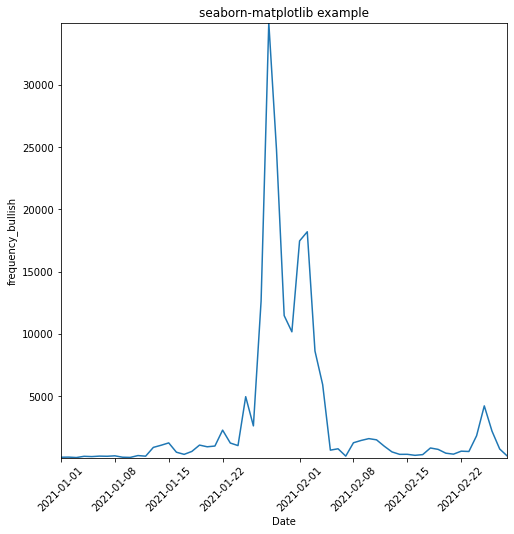

In [45]:
fig, ax = plt.subplots(figsize=(8, 8))

plot=sns.lineplot(x="Date", y="frequency_bullish", data=data_Comb)
plot.set_xlim(data_Comb['Date'].min(), data_Comb['Date'].max())
plot.set_ylim(data_Comb['frequency_bullish'].min(), data_Comb['frequency_bullish'].max())
plt.xticks(rotation=45)
plt.title('seaborn-matplotlib example')
plt.show()

The above plot shows us that in the period between January 26th and February 1st, the acitivity on reddit increased drastically during this period and peaked on January 28th. Later on we will see how this acitivity is related to the parallel increase in the stock price of GME 

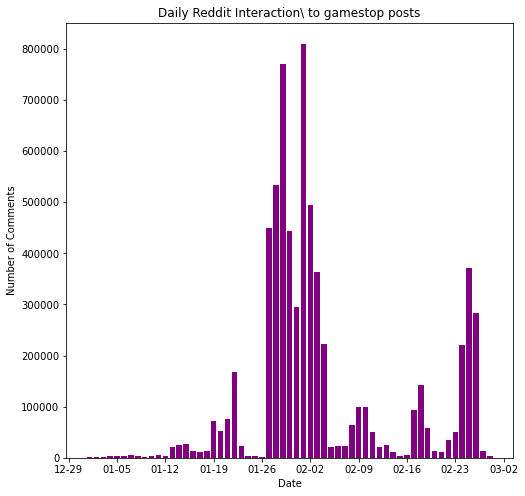

In [46]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(8, 8))

# Add x-axis and y-axis
ax.bar(data_Comb.Date,
       data_Comb.num_comments,
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Number of Comments",
       title="Daily Reddit Interaction\ to gamestop posts")

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.show()


# YAHOO FINANCE

Now that we finished the REDDIT part analysis, we extracted using the web datareader, the summary table of the GME stock for the same period between January and February 2021, from the Yahoo finance website.

This data will be used to create a comprehensive comparison and relation between the huge increase in the acitivity on the subreddit wallstreetbets and the outrageous increase in GME stock price during the end of January period.

In [47]:
import nbconvert
nbconvert.NotebookExporter.output_mimetype = 'application/x-ipynb+json'

In [48]:
gamestop =  web.DataReader('GME','yahoo', dt.datetime(2020,12,31), dt.datetime(2021,2,28))

In [49]:
gamestop.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,19.799999,18.799999,19.250000,18.840000,6922700,18.840000
2021-01-04,19.100000,17.150000,19.000000,17.250000,10022500,17.250000
2021-01-05,18.080000,17.230000,17.350000,17.370001,4961500,17.370001
2021-01-06,18.980000,17.330000,17.340000,18.360001,6056200,18.360001
2021-01-07,19.450001,18.020000,18.469999,18.080000,6129300,18.080000


In [50]:
gamestop.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [51]:
import plotly
import cufflinks as cf
cf.go_offline()

In [52]:
gamestop['Adj Close'].iplot()

The above plot shows us the flucatuation in the GME stock price

In [53]:
revenue_gme = gamestop.pct_change()['Adj Close'][1:]
revenue_gme.iplot()

In the above graph, we can notice the high fluactuation in the percentage increaase in the adjusted stock price.

In [54]:
gamestop = gamestop.reset_index()

In [55]:
a = [{'max': gamestop['Adj Close'].max(),'min': gamestop['Adj Close'].min(), 'average': gamestop['Adj Close'].mean()}]
print(a)

[{'max': 347.510009765625, 'min': 17.25, 'average': 74.1348722898043}]


In [56]:
max_price = gamestop['Adj Close'].max()
min_price = gamestop['Adj Close'].min()
print('maximum Adjusted closing price is {x}\nminimum Adjusted closing price is {y}'.format(x=max_price,
     y= min_price))

maximum Adjusted closing price is 347.510009765625
minimum Adjusted closing price is 17.25


In [57]:
max_date = gamestop[gamestop['Adj Close']== max_price]['Date']
min_date = gamestop[gamestop['Adj Close']== min_price]['Date']
print('maximum Adjusted closing price was at date {x}\nminimum Adjusted closing price was at date {y}'.format(x=max_date,
     y= min_date))

maximum Adjusted closing price was at date 17   2021-01-27
Name: Date, dtype: datetime64[ns]
minimum Adjusted closing price was at date 1   2021-01-04
Name: Date, dtype: datetime64[ns]


In [58]:
gamestop

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-12-31,19.799999,18.799999,19.250000,18.840000,6922700,18.840000
1,2021-01-04,19.100000,17.150000,19.000000,17.250000,10022500,17.250000
2,2021-01-05,18.080000,17.230000,17.350000,17.370001,4961500,17.370001
3,2021-01-06,18.980000,17.330000,17.340000,18.360001,6056200,18.360001
4,2021-01-07,19.450001,18.020000,18.469999,18.080000,6129300,18.080000
5,2021-01-08,18.299999,17.080000,18.180000,17.690001,6482000,17.690001
6,2021-01-11,20.650000,19.010000,19.410000,19.940001,14908000,19.940001
7,2021-01-12,20.400000,19.320000,19.959999,19.950001,7060700,19.950001
8,2021-01-13,38.650002,20.030001,20.420000,31.400000,144501700,31.400000
9,2021-01-14,43.060001,33.049999,38.090000,39.910000,93717400,39.910000


In [59]:
gamestop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       39 non-null     datetime64[ns]
 1   High       39 non-null     float64       
 2   Low        39 non-null     float64       
 3   Open       39 non-null     float64       
 4   Close      39 non-null     float64       
 5   Volume     39 non-null     int64         
 6   Adj Close  39 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 2.3 KB


Next We will create a new column named return, to show us the precentage change in the adjusted close price from one day till the other

In [60]:
gamestop['return'] = gamestop['Adj Close'].pct_change()

In [61]:
gamestop.head()

,Date,High,Low,Open,Close,Volume,Adj Close,return
0,2020-12-31,19.799999,18.799999,19.250000,18.840000,6922700,18.840000,NaN
1,2021-01-04,19.100000,17.150000,19.000000,17.250000,10022500,17.250000,-0.084395
2,2021-01-05,18.080000,17.230000,17.350000,17.370001,4961500,17.370001,0.006957
3,2021-01-06,18.980000,17.330000,17.340000,18.360001,6056200,18.360001,0.056995
4,2021-01-07,19.450001,18.020000,18.469999,18.080000,6129300,18.080000,-0.015251


In [62]:
gamestop = gamestop[gamestop['Date'] > '2020-12-31']

In [63]:
gamestop

,Date,High,Low,Open,Close,Volume,Adj Close,return
1,2021-01-04,19.100000,17.150000,19.000000,17.250000,10022500,17.250000,-0.084395
2,2021-01-05,18.080000,17.230000,17.350000,17.370001,4961500,17.370001,0.006957
3,2021-01-06,18.980000,17.330000,17.340000,18.360001,6056200,18.360001,0.056995
4,2021-01-07,19.450001,18.020000,18.469999,18.080000,6129300,18.080000,-0.015251
5,2021-01-08,18.299999,17.080000,18.180000,17.690001,6482000,17.690001,-0.021571
6,2021-01-11,20.650000,19.010000,19.410000,19.940001,14908000,19.940001,0.127190
7,2021-01-12,20.400000,19.320000,19.959999,19.950001,7060700,19.950001,0.000502
8,2021-01-13,38.650002,20.030001,20.420000,31.400000,144501700,31.400000,0.573935
9,2021-01-14,43.060001,33.049999,38.090000,39.910000,93717400,39.910000,0.271019
10,2021-01-15,40.750000,34.009998,38.490002,35.500000,46866400,35.500000,-0.110499


Now that we have everything ready, we will create a final dataframe to take into consideration the below needed features only.

In [64]:
gme = gamestop[['Date','Volume','Adj Close','return']]

In [65]:
gme.head()

,Date,Volume,Adj Close,return
1,2021-01-04,10022500,17.250000,-0.084395
2,2021-01-05,4961500,17.370001,0.006957
3,2021-01-06,6056200,18.360001,0.056995
4,2021-01-07,6129300,18.080000,-0.015251
5,2021-01-08,6482000,17.690001,-0.021571


In [66]:
gme.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 1 to 38
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       38 non-null     datetime64[ns]
 1   Volume     38 non-null     int64         
 2   Adj Close  38 non-null     float64       
 3   return     38 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 1.5 KB


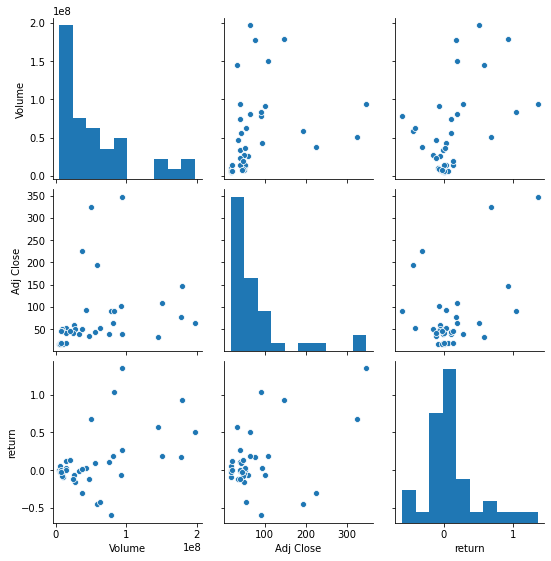

In [67]:
sns.pairplot(gme)

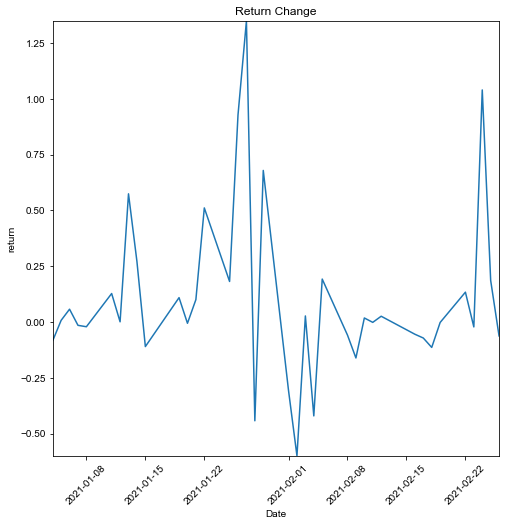

In [68]:
fig, ax = plt.subplots(figsize=(8,8))
sns.set(style="darkgrid")

plot=sns.lineplot(x="Date", y="return", data=gme)
plot.set_xlim(gme['Date'].min(), gme['Date'].max())
plot.set_ylim(gme['return'].min(), gme['return'].max())
plt.xticks(rotation=45)
plt.title('Return Change')
plt.show()

In [69]:
gme.describe()

,Volume,Adj Close,return
count,3.800000e+01,38.000000,38.000000
mean,5.496767e+07,75.590001,0.103917
std,5.373766e+07,77.249367,0.386965
min,4.961500e+06,17.250000,-0.600000
25%,1.343585e+07,39.179999,-0.062995
50%,3.691860e+07,49.910000,0.003729
75%,8.055452e+07,86.697500,0.169223
max,1.971579e+08,347.510010,1.348358


In [229]:
gme.rename(columns = {'Adj Close':'Adj_Close'},inplace=True)

In [245]:
gme.head()

,Date,Volume,Adj_Close,return
1,2021-01-04,10022500,17.250000,-0.084395
2,2021-01-05,4961500,17.370001,0.006957
3,2021-01-06,6056200,18.360001,0.056995
4,2021-01-07,6129300,18.080000,-0.015251
5,2021-01-08,6482000,17.690001,-0.021571


In [247]:
gme.to_csv('C:/Users/Makram/Desktop/305/gme.csv',header=True,index=False)

# Combine REDDIT AND GME FINANCE IN ON DATAFRAME

Now that we have our final Reddit and Yahoo finance Dataframes ready, we wil combine both dataframes based on the similar dates available in both tables.

In [233]:
reddit_gme = pd.merge(left=data_Comb,right= gme, how='inner')

In [234]:
reddit_gme

,Date,num_comments,frequency_bullish,Volume,Adj_Close,return
0,2021-01-04,2935,176,10022500,17.250000,-0.084395
1,2021-01-05,4339,153,4961500,17.370001,0.006957
2,2021-01-06,2583,191,6056200,18.360001,0.056995
3,2021-01-07,4537,179,6129300,18.080000,-0.015251
4,2021-01-08,2927,214,6482000,17.690001,-0.021571
5,2021-01-11,6245,235,14908000,19.940001,0.127190
6,2021-01-12,4008,186,7060700,19.950001,0.000502
7,2021-01-13,21722,891,144501700,31.400000,0.573935
8,2021-01-14,24721,1062,93717400,39.910000,0.271019
9,2021-01-15,26084,1252,46866400,35.500000,-0.110499


In [235]:
reddit_gme['frequency_bullish'].sum()

159030

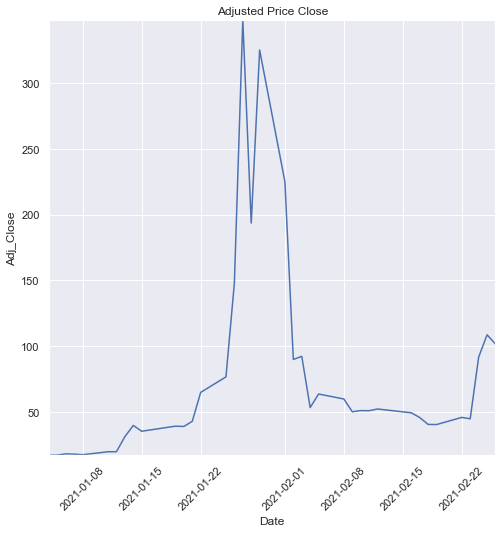

In [236]:
fig, ax = plt.subplots(figsize=(8,8))
sns.set(style="darkgrid")

plot=sns.lineplot(x="Date", y="Adj_Close", data=reddit_gme)
plot.set_xlim(reddit_gme['Date'].min(), reddit_gme['Date'].max())
plot.set_ylim(reddit_gme['Adj_Close'].min(), reddit_gme['Adj_Close'].max())
plt.xticks(rotation=45)
plt.title('Adjusted Price Close')
plt.show()

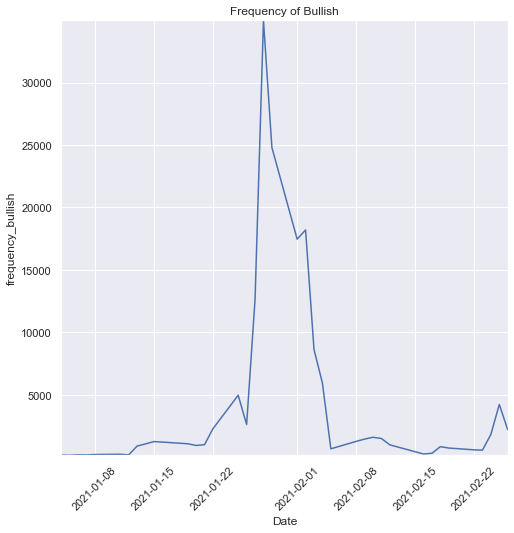

In [75]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.set(style="darkgrid")

plot=sns.lineplot(x="Date", y="frequency_bullish", data=reddit_gme)
plot.set_xlim(reddit_gme['Date'].min(), reddit_gme['Date'].max())
plot.set_ylim(reddit_gme['frequency_bullish'].min(), reddit_gme['frequency_bullish'].max())
maxid = np.argmax(plot) # The id of the peak (maximum of y data)
plt.xticks(rotation=45)
plt.title('Frequency of Bullish')
plt.show()

# Puts and Calls

In [76]:
df = pd.read_html('https://finance.yahoo.com/quote/GME/options')

In [77]:
#df.to_csv('C:/Users/Makram/Desktop/305/putsnotcleaned.csv',header=True)

In [78]:
print(df[0])

         Contract Name         Last Trade Date  Strike  Last Price     Bid  \
0   GME210521C00005000   2021-05-13 1:14PM EDT     5.0      148.70  153.55   
1   GME210521C00010000   2021-03-31 2:40PM EDT    10.0      182.50  162.15   
2   GME210521C00020000   2021-04-27 9:41AM EDT    20.0      164.80  138.55   
3   GME210521C00025000  2021-05-13 11:07AM EDT    25.0      127.75  133.55   
4   GME210521C00030000   2021-05-11 9:50AM EDT    30.0      110.45  128.55   
..                 ...                     ...     ...         ...     ...   
57  GME210521C00390000   2021-05-14 2:47PM EDT   390.0        0.35    0.04   
58  GME210521C00400000   2021-05-14 3:54PM EDT   400.0        0.30    0.29   
59  GME210521C00410000   2021-05-14 3:41PM EDT   410.0        0.29    0.26   
60  GME210521C00420000   2021-05-14 3:56PM EDT   420.0        0.26    0.22   
61  GME210521C00430000   2021-05-14 3:59PM EDT   430.0        0.25    0.23   

       Ask  Change % Change  Volume  Open Interest Implied Vola

In [79]:
print(df[1])

         Contract Name         Last Trade Date  Strike  Last Price     Bid  \
0   GME210521P00005000   2021-05-13 3:51PM EDT     5.0        0.01    0.00   
1   GME210521P00010000  2021-05-11 12:14PM EDT    10.0        0.01    0.00   
2   GME210521P00015000   2021-05-10 9:34AM EDT    15.0        0.01    0.00   
3   GME210521P00020000  2021-05-11 12:48PM EDT    20.0        0.01    0.00   
4   GME210521P00025000   2021-05-14 3:44PM EDT    25.0        0.01    0.00   
..                 ...                     ...     ...         ...     ...   
58  GME210521P00390000  2021-05-12 12:42PM EDT   390.0      245.50  229.30   
59  GME210521P00400000  2021-05-10 10:34AM EDT   400.0      250.50  239.25   
60  GME210521P00410000  2021-04-05 10:53AM EDT   410.0      241.15  249.20   
61  GME210521P00420000  2021-05-10 11:28AM EDT   420.0      268.93  259.25   
62  GME210521P00430000  2021-05-13 12:17PM EDT   430.0      278.85  269.25   

       Ask  Change % Change  Volume  Open Interest Implied Vola

## CALLS

In [80]:
calls = pd.DataFrame(df[0])

In [81]:
calls

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,GME210521C00005000,2021-05-13 1:14PM EDT,5.0,148.70,153.55,156.15,0.00,-,1,4,"1,817.97%"
1,GME210521C00010000,2021-03-31 2:40PM EDT,10.0,182.50,162.15,165.20,0.00,-,1,0,0.00%
2,GME210521C00020000,2021-04-27 9:41AM EDT,20.0,164.80,138.55,141.15,0.00,-,1,2,976.17%
3,GME210521C00025000,2021-05-13 11:07AM EDT,25.0,127.75,133.55,136.15,0.00,-,2,1,866.41%
4,GME210521C00030000,2021-05-11 9:50AM EDT,30.0,110.45,128.55,131.15,0.00,-,1,0,779.88%
...,...,...,...,...,...,...,...,...,...,...,...
57,GME210521C00390000,2021-05-14 2:47PM EDT,390.0,0.35,0.04,0.43,-0.95,-73.08%,31,172,287.70%
58,GME210521C00400000,2021-05-14 3:54PM EDT,400.0,0.30,0.29,0.30,-0.80,-72.73%,791,2643,302.73%
59,GME210521C00410000,2021-05-14 3:41PM EDT,410.0,0.29,0.26,0.42,-0.83,-74.11%,35,311,315.04%
60,GME210521C00420000,2021-05-14 3:56PM EDT,420.0,0.26,0.22,0.30,-0.78,-75.00%,125,1547,311.13%


In [82]:
# dropping unneeded columns 
calls = calls.drop(["Contract Name","Change","Last Price","Open Interest","Bid","Ask","% Change","Volume","Open Interest"],axis=1)
print(calls)


           Last Trade Date  Strike Implied Volatility
0    2021-05-13 1:14PM EDT     5.0          1,817.97%
1    2021-03-31 2:40PM EDT    10.0              0.00%
2    2021-04-27 9:41AM EDT    20.0            976.17%
3   2021-05-13 11:07AM EDT    25.0            866.41%
4    2021-05-11 9:50AM EDT    30.0            779.88%
..                     ...     ...                ...
57   2021-05-14 2:47PM EDT   390.0            287.70%
58   2021-05-14 3:54PM EDT   400.0            302.73%
59   2021-05-14 3:41PM EDT   410.0            315.04%
60   2021-05-14 3:56PM EDT   420.0            311.13%
61   2021-05-14 3:59PM EDT   430.0            316.02%

[62 rows x 3 columns]


In [83]:
# rename columns names by removing spaces and replacing it with underscore 
calls = calls.rename(columns={'Last Price': 'Last_Price','Implied Volatility':'Implied_Volatility','Last Trade Date':'Last_Trade_Date'})
print(calls)

           Last_Trade_Date  Strike Implied_Volatility
0    2021-05-13 1:14PM EDT     5.0          1,817.97%
1    2021-03-31 2:40PM EDT    10.0              0.00%
2    2021-04-27 9:41AM EDT    20.0            976.17%
3   2021-05-13 11:07AM EDT    25.0            866.41%
4    2021-05-11 9:50AM EDT    30.0            779.88%
..                     ...     ...                ...
57   2021-05-14 2:47PM EDT   390.0            287.70%
58   2021-05-14 3:54PM EDT   400.0            302.73%
59   2021-05-14 3:41PM EDT   410.0            315.04%
60   2021-05-14 3:56PM EDT   420.0            311.13%
61   2021-05-14 3:59PM EDT   430.0            316.02%

[62 rows x 3 columns]


In [84]:
# clean the last trade date and keep only date format : year-month-day 
calls['Last_Trade_Date'] = calls['Last_Trade_Date'].str[:10]
print (calls['Last_Trade_Date'])

0     2021-05-13
1     2021-03-31
2     2021-04-27
3     2021-05-13
4     2021-05-11
         ...    
57    2021-05-14
58    2021-05-14
59    2021-05-14
60    2021-05-14
61    2021-05-14
Name: Last_Trade_Date, Length: 62, dtype: object


In [85]:
calls 

,Last_Trade_Date,Strike,Implied_Volatility
0,2021-05-13,5.0,"1,817.97%"
1,2021-03-31,10.0,0.00%
2,2021-04-27,20.0,976.17%
3,2021-05-13,25.0,866.41%
4,2021-05-11,30.0,779.88%
...,...,...,...
57,2021-05-14,390.0,287.70%
58,2021-05-14,400.0,302.73%
59,2021-05-14,410.0,315.04%
60,2021-05-14,420.0,311.13%


In [86]:
# remove % from implied volatility feature 
import numpy as np 
calls['Implied_Volatility']=list(map(lambda x: x[:-1],calls['Implied_Volatility'].values))
print(calls)

   Last_Trade_Date  Strike Implied_Volatility
0       2021-05-13     5.0           1,817.97
1       2021-03-31    10.0               0.00
2       2021-04-27    20.0             976.17
3       2021-05-13    25.0             866.41
4       2021-05-11    30.0             779.88
..             ...     ...                ...
57      2021-05-14   390.0             287.70
58      2021-05-14   400.0             302.73
59      2021-05-14   410.0             315.04
60      2021-05-14   420.0             311.13
61      2021-05-14   430.0             316.02

[62 rows x 3 columns]


In [87]:
# remove comman in implied volatility so we can convert into numerical value and get its mean 
calls['Implied_Volatility'] = calls['Implied_Volatility'].str.replace(",","")
calls

,Last_Trade_Date,Strike,Implied_Volatility
0,2021-05-13,5.0,1817.97
1,2021-03-31,10.0,0.00
2,2021-04-27,20.0,976.17
3,2021-05-13,25.0,866.41
4,2021-05-11,30.0,779.88
...,...,...,...
57,2021-05-14,390.0,287.70
58,2021-05-14,400.0,302.73
59,2021-05-14,410.0,315.04
60,2021-05-14,420.0,311.13


In [88]:
# convert implied volatility from object to float 
calls['Implied_Volatility']=calls['Implied_Volatility'].astype("float64")

In [89]:
# group by last trade date and get the mean of the other columns 
calls= calls.groupby(['Last_Trade_Date']).median().round(2)
print(calls)

                 Strike  Implied_Volatility
Last_Trade_Date                            
2021-03-31         10.0                0.00
2021-04-27         20.0              976.17
2021-05-04         45.0              595.12
2021-05-10         57.5              487.70
2021-05-11         55.0              563.72
2021-05-13         45.0              650.29
2021-05-14        190.0              187.70


In [90]:
#create identical dataframe to plot trade time 
calls1=calls.reset_index()

In [91]:
calls1['Last_Trade_Date']=calls1['Last_Trade_Date'].astype("datetime64")

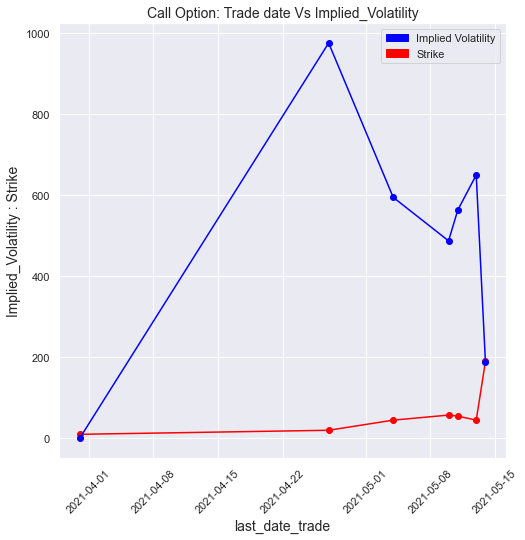

In [92]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.figure(figsize=(8,8))
plt.plot(calls1['Last_Trade_Date'], calls1['Strike'], color='red', marker='o')
plt.title('Trade date Vs Strike', fontsize=14)
plt.xlabel('last_date_trade', fontsize=14)

plt.plot(calls1['Last_Trade_Date'], calls1['Implied_Volatility'], color='blue', marker='o')
plt.title('Call Option: Trade date Vs Implied_Volatility', fontsize=14)
plt.xlabel('last_date_trade', fontsize=14)
plt.ylabel('Implied_Volatility : Strike', fontsize=14)
plt.grid(True)


red_patch = mpatches.Patch(color='red', label='Strike')
blue_patch =mpatches.Patch(color='blue',label='Implied Volatility')
plt.xticks(rotation=45)
plt.legend(handles=[blue_patch,red_patch])

plt.show()

In [93]:
calls.to_csv('C:/Users/Makram/Desktop/305/calls.csv',header=True)

## PUTS

In [94]:
puts = pd.DataFrame(df[1])

In [95]:
puts

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,GME210521P00005000,2021-05-13 3:51PM EDT,5.0,0.01,0.00,0.01,0.00,-,5,1441,850.00%
1,GME210521P00010000,2021-05-11 12:14PM EDT,10.0,0.01,0.00,0.01,0.00,-,3,997,675.00%
2,GME210521P00015000,2021-05-10 9:34AM EDT,15.0,0.01,0.00,0.01,0.00,-,1,465,562.50%
3,GME210521P00020000,2021-05-11 12:48PM EDT,20.0,0.01,0.00,0.01,-0.02,-66.67%,1,1063,500.00%
4,GME210521P00025000,2021-05-14 3:44PM EDT,25.0,0.01,0.00,0.01,0.00,-,2,1250,437.50%
...,...,...,...,...,...,...,...,...,...,...,...
58,GME210521P00390000,2021-05-12 12:42PM EDT,390.0,245.50,229.30,231.85,0.00,-,10,14,316.80%
59,GME210521P00400000,2021-05-10 10:34AM EDT,400.0,250.50,239.25,241.80,0.00,-,1,957,319.34%
60,GME210521P00410000,2021-04-05 10:53AM EDT,410.0,241.15,249.20,251.75,0.00,-,8,18,321.29%
61,GME210521P00420000,2021-05-10 11:28AM EDT,420.0,268.93,259.25,261.80,0.00,-,1,47,333.01%


In [96]:
# dropping unneeded columns 
puts = puts.drop(["Contract Name","Last Price","Change","Open Interest","Bid","Ask","% Change","Volume","Open Interest"],axis=1)
print(puts)

           Last Trade Date  Strike Implied Volatility
0    2021-05-13 3:51PM EDT     5.0            850.00%
1   2021-05-11 12:14PM EDT    10.0            675.00%
2    2021-05-10 9:34AM EDT    15.0            562.50%
3   2021-05-11 12:48PM EDT    20.0            500.00%
4    2021-05-14 3:44PM EDT    25.0            437.50%
..                     ...     ...                ...
58  2021-05-12 12:42PM EDT   390.0            316.80%
59  2021-05-10 10:34AM EDT   400.0            319.34%
60  2021-04-05 10:53AM EDT   410.0            321.29%
61  2021-05-10 11:28AM EDT   420.0            333.01%
62  2021-05-13 12:17PM EDT   430.0            339.65%

[63 rows x 3 columns]


In [97]:
# rename columns names by removing spaces and replacing it with underscore 
puts = puts.rename(columns={'Last Price': 'Last_Price','Implied Volatility':'Implied_Volatility','Last Trade Date':'Last_Trade_Date'})
print(puts)

           Last_Trade_Date  Strike Implied_Volatility
0    2021-05-13 3:51PM EDT     5.0            850.00%
1   2021-05-11 12:14PM EDT    10.0            675.00%
2    2021-05-10 9:34AM EDT    15.0            562.50%
3   2021-05-11 12:48PM EDT    20.0            500.00%
4    2021-05-14 3:44PM EDT    25.0            437.50%
..                     ...     ...                ...
58  2021-05-12 12:42PM EDT   390.0            316.80%
59  2021-05-10 10:34AM EDT   400.0            319.34%
60  2021-04-05 10:53AM EDT   410.0            321.29%
61  2021-05-10 11:28AM EDT   420.0            333.01%
62  2021-05-13 12:17PM EDT   430.0            339.65%

[63 rows x 3 columns]


In [98]:
# clean the last trade date and keep only date format : year-month-day 
puts['Last_Trade_Date'] = puts['Last_Trade_Date'].str[:10]
print (puts['Last_Trade_Date'])

0     2021-05-13
1     2021-05-11
2     2021-05-10
3     2021-05-11
4     2021-05-14
         ...    
58    2021-05-12
59    2021-05-10
60    2021-04-05
61    2021-05-10
62    2021-05-13
Name: Last_Trade_Date, Length: 63, dtype: object


In [99]:
# remove % from implied volatility feature 
import numpy as np 
puts['Implied_Volatility']=list(map(lambda x: x[:-1],puts['Implied_Volatility'].values))
print(puts)

   Last_Trade_Date  Strike Implied_Volatility
0       2021-05-13     5.0             850.00
1       2021-05-11    10.0             675.00
2       2021-05-10    15.0             562.50
3       2021-05-11    20.0             500.00
4       2021-05-14    25.0             437.50
..             ...     ...                ...
58      2021-05-12   390.0             316.80
59      2021-05-10   400.0             319.34
60      2021-04-05   410.0             321.29
61      2021-05-10   420.0             333.01
62      2021-05-13   430.0             339.65

[63 rows x 3 columns]


In [100]:
# remove comman in implied volatility so we can convert into numerical value and get its mean 
puts['Implied_Volatility'] = puts['Implied_Volatility'].str.replace(",","")
puts

,Last_Trade_Date,Strike,Implied_Volatility
0,2021-05-13,5.0,850.00
1,2021-05-11,10.0,675.00
2,2021-05-10,15.0,562.50
3,2021-05-11,20.0,500.00
4,2021-05-14,25.0,437.50
...,...,...,...
58,2021-05-12,390.0,316.80
59,2021-05-10,400.0,319.34
60,2021-04-05,410.0,321.29
61,2021-05-10,420.0,333.01


In [101]:
# convert implied volatility from object to float 
puts['Implied_Volatility']=puts['Implied_Volatility'].astype("float64")

In [102]:
# group by last trade date and get the mean of the other columns 
puts= puts.groupby(['Last_Trade_Date']).mean().round(2)
print(puts)

                 Strike  Implied_Volatility
Last_Trade_Date                            
2021-04-05       410.00              321.29
2021-04-23       340.00              284.67
2021-04-26       380.00              309.38
2021-04-27       310.00              262.99
2021-04-29       310.00              257.98
2021-05-03       360.00              297.85
2021-05-04       290.00              246.09
2021-05-06       260.00              218.21
2021-05-10       297.00              350.78
2021-05-11       150.00              414.18
2021-05-12       390.00              316.80
2021-05-13       218.33              454.69
2021-05-14       121.54              194.77


In [103]:
puts.shape 

(13, 2)

In [104]:
puts1=puts

In [105]:
puts1

,Strike,Implied_Volatility
Last_Trade_Date,,
2021-04-05,410.00,321.29
2021-04-23,340.00,284.67
2021-04-26,380.00,309.38
2021-04-27,310.00,262.99
2021-04-29,310.00,257.98
2021-05-03,360.00,297.85
2021-05-04,290.00,246.09
2021-05-06,260.00,218.21
2021-05-10,297.00,350.78


In [106]:
puts1=puts1.reset_index()

In [107]:
puts1.columns

Index(['Last_Trade_Date', 'Strike', 'Implied_Volatility'], dtype='object')

In [108]:
puts1['Last_Trade_Date']=puts1['Last_Trade_Date'].astype("datetime64")

In [109]:
puts1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Last_Trade_Date     13 non-null     datetime64[ns]
 1   Strike              13 non-null     float64       
 2   Implied_Volatility  13 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 440.0 bytes


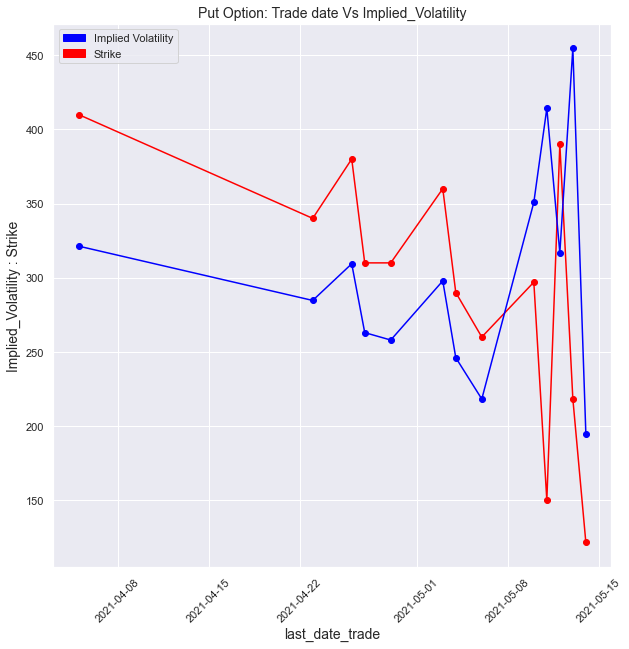

In [110]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.figure(figsize=(10,10))
plt.plot(puts1['Last_Trade_Date'], puts1['Strike'], color='red', marker='o')
plt.title('Trade date Vs Strike', fontsize=14)
plt.xlabel('last_date_trade', fontsize=14)

plt.plot(puts1['Last_Trade_Date'], puts1['Implied_Volatility'], color='blue', marker='o')
plt.title('Put Option: Trade date Vs Implied_Volatility', fontsize=14)
plt.xlabel('last_date_trade', fontsize=14)
plt.ylabel('Implied_Volatility : Strike', fontsize=14)
plt.grid(True)


red_patch = mpatches.Patch(color='red', label='Strike')
blue_patch =mpatches.Patch(color='blue',label='Implied Volatility')
plt.xticks(rotation=45)
plt.legend(handles=[blue_patch,red_patch])

plt.show()

In [111]:
puts.to_csv('C:/Users/Makram/Desktop/305/puts.csv',header=True)

# Insider Trading

In [112]:
df=pd.read_csv("C:/Users/Makram/Desktop/insider_trade.csv")
print(df)

    Unnamed: 0       Filing_date  Trade_date Ticker        Insider_Name   \
0            0  19/01/2021 17:12  15/01/2021    GME     Fernandez Raul J   
1            1  15/01/2021 16:15  13/01/2021    GME      Vrabeck Kathy P   
2            2  15/01/2021 16:15  13/01/2021    GME     Fernandez Raul J   
3            3  15/01/2021 16:14  13/01/2021    GME        Dunn Lizabeth   
4            4  14/01/2021 18:59  12/01/2021    GME      Wolf Kurt James   
..         ...               ...         ...    ...                  ...   
67          61  26/05/2020 18:38  22/05/2020    BBY      Hartman Todd G.   
68          62  26/05/2020 18:38  22/05/2020    BBY     Furman Matthew M   
69          63  26/05/2020 18:37  22/05/2020    BBY    Bilunas Matthew M   
70          64  26/05/2020 18:37  22/05/2020    BBY        Barry Corie S   
71          65  26/05/2020 18:37  22/05/2020    BBY  Alexander Whitney L   

                            Title Trade_Type   Price      Qty   Owned   Own  \
0       

In [113]:
df.columns

Index(['Unnamed: 0', 'Filing_date', 'Trade_date', 'Ticker', 'Insider_Name ',
       'Title', 'Trade_Type', 'Price', 'Qty', 'Owned', 'Own', 'Value'],
      dtype='object')

In [114]:
df=df.drop(["Filing_date","Unnamed: 0","Owned","Own","Title"],axis=1)
df

,Trade_date,Ticker,Insider_Name,Trade_Type,Price,Qty,Value
0,15/01/2021,GME,Fernandez Raul J,S - Sale,$37.71,-3500,"-$131,980"
1,13/01/2021,GME,Vrabeck Kathy P,S - Sale,$27.99,-50000,"-$1,399,341"
2,13/01/2021,GME,Fernandez Raul J,S - Sale,$35.28,-34619,"-$1,221,216"
3,13/01/2021,GME,Dunn Lizabeth,S - Sale,$31.34,-5000,"-$156,700"
4,12/01/2021,GME,Wolf Kurt James,S - Sale,$21.22,-810000,"-$17,190,000"
...,...,...,...,...,...,...,...
67,22/05/2020,BBY,Hartman Todd G.,S - Sale,$77.41,-2703,"-$209,248"
68,22/05/2020,BBY,Furman Matthew M,S - Sale,$77.49,-8010,"-$620,709"
69,22/05/2020,BBY,Bilunas Matthew M,S - Sale,$77.41,-1752,"-$135,628"
70,22/05/2020,BBY,Barry Corie S,S - Sale,$77.49,-18844,"-$1,460,255"


In [115]:
df["Trade_date"]=pd.to_datetime(df["Trade_date"]).dt.strftime('%Y-%m-%d')
print(df)

    Trade_date Ticker        Insider_Name  Trade_Type   Price      Qty  \
0   2021-01-15    GME     Fernandez Raul J   S - Sale  $37.71    -3500   
1   2021-01-13    GME      Vrabeck Kathy P   S - Sale  $27.99   -50000   
2   2021-01-13    GME     Fernandez Raul J   S - Sale  $35.28   -34619   
3   2021-01-13    GME        Dunn Lizabeth   S - Sale  $31.34    -5000   
4   2021-12-01    GME      Wolf Kurt James   S - Sale  $21.22  -810000   
..         ...    ...                  ...        ...     ...      ...   
67  2020-05-22    BBY      Hartman Todd G.   S - Sale  $77.41    -2703   
68  2020-05-22    BBY     Furman Matthew M   S - Sale  $77.49    -8010   
69  2020-05-22    BBY    Bilunas Matthew M   S - Sale  $77.41    -1752   
70  2020-05-22    BBY        Barry Corie S   S - Sale  $77.49   -18844   
71  2020-05-22    BBY  Alexander Whitney L   S - Sale  $77.41    -3128   

           Value  
0      -$131,980  
1    -$1,399,341  
2    -$1,221,216  
3      -$156,700  
4   -$17,190,000

In [116]:
# remove dollar sign from the price 
df['Price'] = df['Price'].replace({r'\$':''}, regex = True)
df['Value'] = df['Value'].replace({r'\$':''}, regex = True)
df.head()

,Trade_date,Ticker,Insider_Name,Trade_Type,Price,Qty,Value
0,2021-01-15,GME,Fernandez Raul J,S - Sale,37.71,-3500,"-131,980"
1,2021-01-13,GME,Vrabeck Kathy P,S - Sale,27.99,-50000,"-1,399,341"
2,2021-01-13,GME,Fernandez Raul J,S - Sale,35.28,-34619,"-1,221,216"
3,2021-01-13,GME,Dunn Lizabeth,S - Sale,31.34,-5000,"-156,700"
4,2021-12-01,GME,Wolf Kurt James,S - Sale,21.22,-810000,"-17,190,000"


In [117]:
df.dtypes

Trade_date       object
Ticker           object
Insider_Name     object
Trade_Type       object
Price            object
Qty              object
Value            object
dtype: object

In [118]:
# convert price to numeric feature data type 
df['Price']=df['Price'].astype("float64")
df['Value'] = df['Value'].str.replace(",","")
df['Qty'] = df['Qty'].str.replace(",","")
df['Value']=df['Value'].astype("float64")
df.dtypes

Trade_date        object
Ticker            object
Insider_Name      object
Trade_Type        object
Price            float64
Qty               object
Value            float64
dtype: object

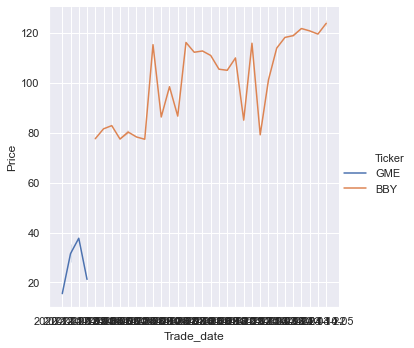

In [119]:
import seaborn as sns 
sns.set(style="white") #change style
sns.set_palette('viridis')
sns.set(rc={'figure.figsize':(20,16)})

sns.relplot(
    data=df, x="Trade_date", y="Price",
    hue="Ticker", kind="line"
)

In [120]:
df.reset_index(level=0, inplace=True)

Now we will create an id column in order to have unique reference for each row

In [121]:
df['id']=df['index']

In [122]:
df.drop(["index"],axis=1,inplace=True)

In [123]:
insider = df
insider

,Trade_date,Ticker,Insider_Name,Trade_Type,Price,Qty,Value,id
0,2021-01-15,GME,Fernandez Raul J,S - Sale,37.71,-3500,-131980.0,0
1,2021-01-13,GME,Vrabeck Kathy P,S - Sale,27.99,-50000,-1399341.0,1
2,2021-01-13,GME,Fernandez Raul J,S - Sale,35.28,-34619,-1221216.0,2
3,2021-01-13,GME,Dunn Lizabeth,S - Sale,31.34,-5000,-156700.0,3
4,2021-12-01,GME,Wolf Kurt James,S - Sale,21.22,-810000,-17190000.0,4
...,...,...,...,...,...,...,...,...
67,2020-05-22,BBY,Hartman Todd G.,S - Sale,77.41,-2703,-209248.0,67
68,2020-05-22,BBY,Furman Matthew M,S - Sale,77.49,-8010,-620709.0,68
69,2020-05-22,BBY,Bilunas Matthew M,S - Sale,77.41,-1752,-135628.0,69
70,2020-05-22,BBY,Barry Corie S,S - Sale,77.49,-18844,-1460255.0,70


In [124]:
df.to_csv("C:/Users/Makram/Desktop/insider_trade_test.csv",index=False)

# Storing Data into SQL

In [140]:
import mysql.connector
from mysql.connector import Error

In [141]:
def create_server_connection(host_name,user_name,user_password):
    connection =None
    try:
        connection=mysql.connector.connect(
        host=host_name,
        user=user_name,
        passwd=user_password
        )
        print("MySQL database connection successful")
    except Error as err:
        print(f"Error:'{err}'")
              
    return connection

In [142]:
connection = create_server_connection("localhost","root","@@@@")

MySQL database connection successful


In [143]:
def create_database(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        print("Database created successfully")
    except Error as err:
        print(f"Error: '{err}'")

In [144]:
create_database_query = "CREATE DATABASE REDDIT"
create_database(connection, create_database_query)

Error: '1007 (HY000): Can't create database 'reddit'; database exists'


In [145]:
def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
            )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")
    return connection

In [146]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

In [184]:
from sqlalchemy import create_engine

# Credentials to database connection
hostname="localhost"
dbname="REDDIT"
uname="root"
pwd="@@@@"

# Create SQLAlchemy engine to connect to MySQL Database
engine = create_engine("mysql+mysqlconnector://{user}:{pw}@{host}/{db}".format(host=hostname, db=dbname, user=uname, pw=pwd))

Convert cleaned Reddit dataframe to MySQL table 

In [204]:
# Convert cleaned Reddit to sql table     
engine = create_engine("mysql+mysqlconnector://{user}:{pw}@{host}/{db}".format(host=hostname, db=dbname, user=uname, pw=pwd))
Reddit_clean.to_sql('reddit', engine, index=False,if_exists='replace')

In [205]:
with engine.connect() as engine:
    engine.execute('ALTER TABLE `reddit` ADD PRIMARY KEY (`Date`);')

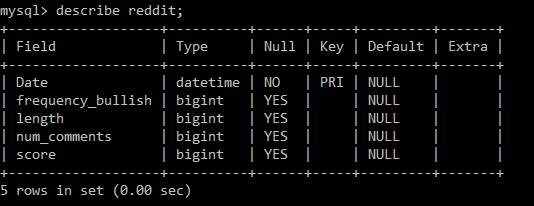

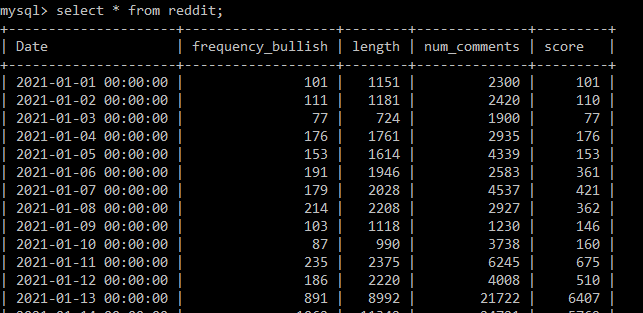

Convert cleaned GME Yahoo Stock Prices dataframe to MySQL table

In [237]:
# Convert GME stock prices to sql table                                   
engine = create_engine("mysql+mysqlconnector://{user}:{pw}@{host}/{db}".format(host=hostname, db=dbname, user=uname, pw=pwd))
gme.to_sql('gme', engine, index=False,if_exists='replace')

In [238]:
with engine.connect() as engine:
    engine.execute('ALTER TABLE `gme` ADD PRIMARY KEY (`Date`);')

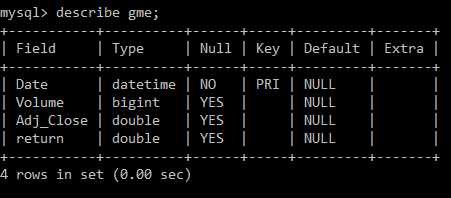

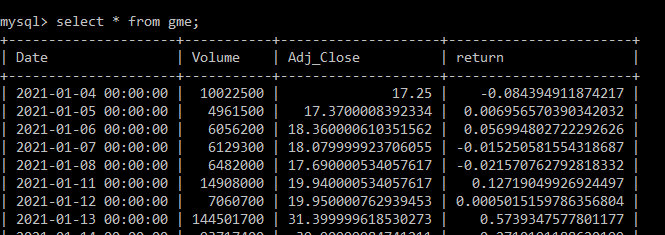

Convert Combined REDDIT & GME stock prices to MySQL table 

In [239]:
# Convert Combined REDDIT & GME stock prices to sql table                                   
engine = create_engine("mysql+mysqlconnector://{user}:{pw}@{host}/{db}".format(host=hostname, db=dbname, user=uname, pw=pwd))
reddit_gme.to_sql('reddit_gme', engine, index=False,if_exists='replace')

In [240]:
with engine.connect() as engine:
    engine.execute('ALTER TABLE `reddit_gme` ADD PRIMARY KEY (`Date`);')

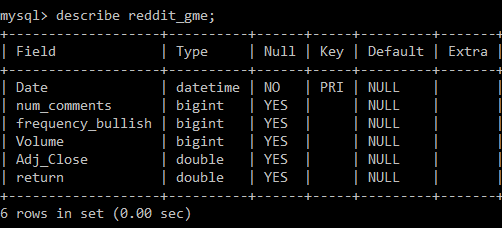

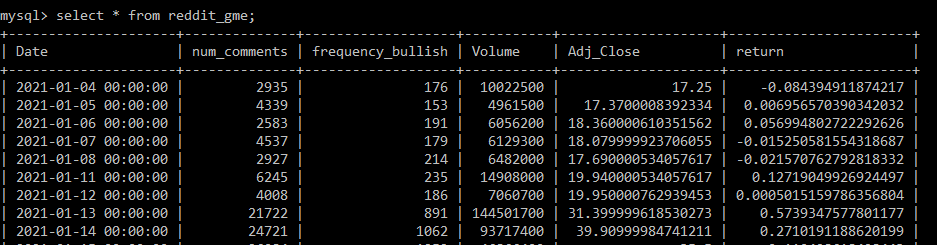

Convert the Puts dataframe to MySQL table

In [210]:
# Convert Puts table to sql table                                   
engine = create_engine("mysql+mysqlconnector://{user}:{pw}@{host}/{db}".format(host=hostname, db=dbname, user=uname, pw=pwd))
puts1.to_sql('puts', engine, index=False,if_exists='replace')

In [211]:
with engine.connect() as engine:
    engine.execute('ALTER TABLE `puts` ADD PRIMARY KEY (`Last_Trade_Date`);')

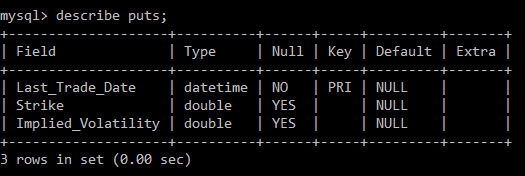

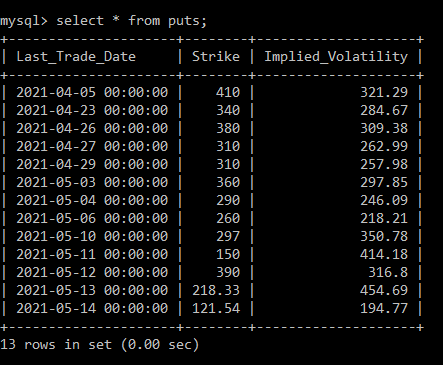

Convert the Calls dataframe to MySQL table

In [212]:
# Convert Calls table to sql table                              
engine = create_engine("mysql+mysqlconnector://{user}:{pw}@{host}/{db}".format(host=hostname, db=dbname, user=uname, pw=pwd))
calls1.to_sql('calls', engine, index=False,if_exists='replace')

In [213]:
with engine.connect() as engine:
    engine.execute('ALTER TABLE `calls` ADD PRIMARY KEY (`Last_Trade_Date`);')

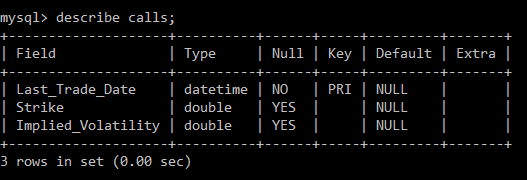

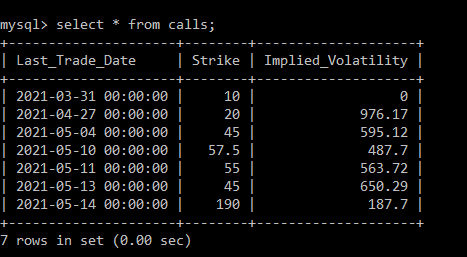

Now we can see clearly that our tables were created successufuly

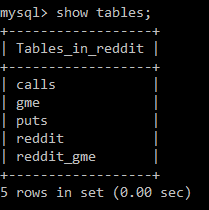

## Load Data from MYSQL

### Queries Examples

### Querry 1

In this first querry we will retrieve all the information stored inside the reddit table on MySQL and use tohe exracted data in order to plot the graph of frequency of bullish per date

In [214]:
from sqlalchemy import create_engine
import pandas as pd

db_connection = create_engine("mysql+mysqlconnector://{user}:{pw}@{host}/{db}".format(host=hostname, db=dbname, user=uname, pw=pwd))

df = pd.read_sql('SELECT * from reddit', con=db_connection,index_col='Date')

In [215]:
df

,frequency_bullish,length,num_comments,score
Date,,,,
2021-01-01,101,1151,2300,101
2021-01-02,111,1181,2420,110
2021-01-03,77,724,1900,77
2021-01-04,176,1761,2935,176
2021-01-05,153,1614,4339,153
2021-01-06,191,1946,2583,361
2021-01-07,179,2028,4537,421
2021-01-08,214,2208,2927,362
2021-01-09,103,1118,1230,146


In [216]:
df=df.reset_index()

In [217]:
df.columns

Index(['Date', 'frequency_bullish', 'length', 'num_comments', 'score'], dtype='object')

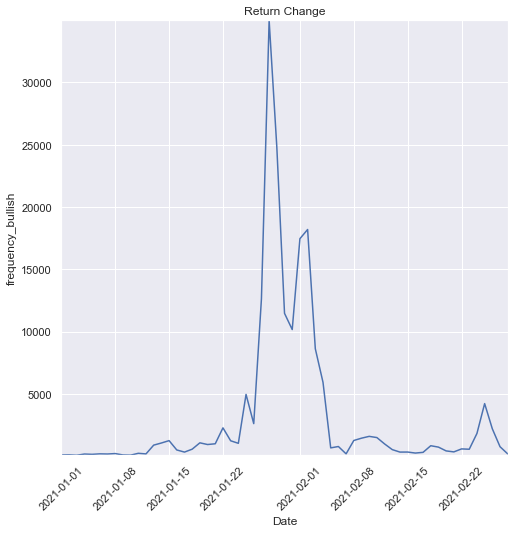

In [218]:
fig, ax = plt.subplots(figsize=(8,8))
sns.set(style="darkgrid")

plot=sns.lineplot(x="Date", y="frequency_bullish", data=df)
plot.set_xlim(df['Date'].min(), df['Date'].max())
plot.set_ylim(df['frequency_bullish'].min(), df['frequency_bullish'].max())
plt.xticks(rotation=45)
plt.title('Return Change')
plt.show()

### Querry 2

In this second querry we will retrieve from reddit table, the index, date, number of comments and frequency of bullish between the dates 27/01/2021 and 31/01/2021

In [220]:
from sqlalchemy import create_engine
import pandas as pd

db_connection = create_engine("mysql+mysqlconnector://{user}:{pw}@{host}/{db}".format(host=hostname, 
                                                                                      db=dbname, user=uname, pw=pwd))

df2 = pd.read_sql('SELECT Date,frequency_bullish, num_comments from reddit where (Date > "2021-01-27" AND Date< "2021-01-31")',
                  con=db_connection,index_col='Date')

In [221]:
df2

,frequency_bullish,num_comments
Date,,
2021-01-28,34975,534346
2021-01-29,24799,769783
2021-01-30,11467,443545


### Query 3

Let's say we want to select the distinct strike values from the puts table

In [227]:
db_connection = create_engine("mysql+mysqlconnector://{user}:{pw}@{host}/{db}".format(host=hostname,
                                                                                      db=dbname, user=uname, pw=pwd))

df3= pd.read_sql('SELECT distinct strike from puts ORDER BY strike DESC', con=db_connection)

In [228]:
df3

,strike
0,410.00
1,390.00
2,380.00
3,360.00
4,340.00
5,310.00
6,297.00
7,290.00
8,260.00
9,218.33


### Query 4

Let's say we want to retrieve the date of the maximum adjusted closing price achieved by the GME stock

In [241]:
db_connection = create_engine("mysql+mysqlconnector://{user}:{pw}@{host}/{db}".format(host=hostname,
                                                                                      db=dbname, user=uname, pw=pwd))

df4= pd.read_sql('select Date,Adj_close from gme WHERE Adj_close=(Select MAX(Adj_close) from gme);', con=db_connection)

In [242]:
df4

,Date,Adj_close
0,2021-01-27,347.51001


### Query 5

Joining the reddit cleaned table and GME table using the Date as the common attribute

In [243]:
db_connection = create_engine("mysql+mysqlconnector://{user}:{pw}@{host}/{db}".format(host=hostname,
                                                                                      db=dbname, user=uname, pw=pwd))

df5= pd.read_sql('select * from reddit.reddit, reddit.gme WHERE reddit.Date=gme.Date;', con=db_connection)

In [244]:
df5

,Date,frequency_bullish,length,num_comments,score,Date,Volume,Adj_Close,return
0,2021-01-04,176,1761,2935,176,2021-01-04,10022500,17.250000,-0.084395
1,2021-01-05,153,1614,4339,153,2021-01-05,4961500,17.370001,0.006957
2,2021-01-06,191,1946,2583,361,2021-01-06,6056200,18.360001,0.056995
3,2021-01-07,179,2028,4537,421,2021-01-07,6129300,18.080000,-0.015251
4,2021-01-08,214,2208,2927,362,2021-01-08,6482000,17.690001,-0.021571
5,2021-01-11,235,2375,6245,675,2021-01-11,14908000,19.940001,0.127190
6,2021-01-12,186,2220,4008,510,2021-01-12,7060700,19.950001,0.000502
7,2021-01-13,891,8992,21722,6407,2021-01-13,144501700,31.400000,0.573935
8,2021-01-14,1062,11342,24721,5769,2021-01-14,93717400,39.910000,0.271019
9,2021-01-15,1252,13971,26084,7633,2021-01-15,46866400,35.500000,-0.110499


### Query 6

Reterive the all the attributes on the days where the bullish frequency was greater than 10000

In [199]:
B = pd.read_sql('SELECT * from reddit where frequency_bullish >= 10000', con=db_connection,index_col='index')
B

,Date,frequency_bullish,length,num_comments,score
index,,,,,
26,2021-01-27,12631,200319,450177,116086
27,2021-01-28,34975,444812,534346,214955
28,2021-01-29,24799,314870,769783,1277809
29,2021-01-30,11467,154669,443545,2631208
30,2021-01-31,10166,132261,294336,2348238
31,2021-02-01,17458,231787,809892,3228585
32,2021-02-02,18195,242751,495273,1922369


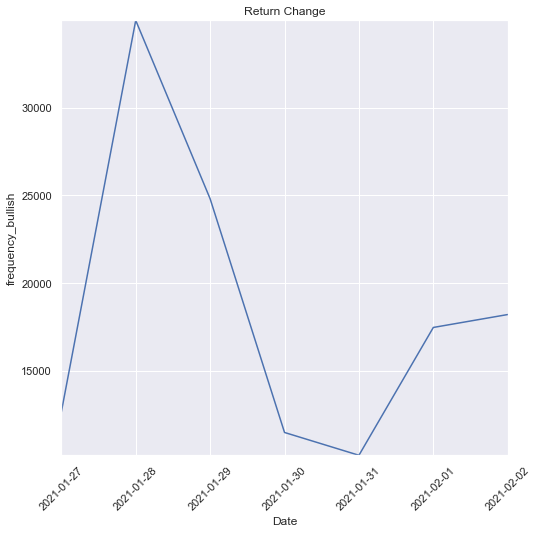

In [200]:
fig, ax = plt.subplots(figsize=(8,8))
sns.set(style="darkgrid")

plot=sns.lineplot(x="Date", y="frequency_bullish", data=B)
plot.set_xlim(B['Date'].min(), B['Date'].max())
plot.set_ylim(B['frequency_bullish'].min(), B['frequency_bullish'].max())
plt.xticks(rotation=45)
plt.title('Return Change')
plt.show()

# Cassandra

### 1-REDDIT TABLE

In [248]:
from cassandra.cluster import Cluster
from cassandra.policies import DCAwareRoundRobinPolicy

cluster = Cluster(['localhost'],load_balancing_policy=DCAwareRoundRobinPolicy(),port=9042,protocol_version=4)
session = cluster.connect()
session.set_keyspace('reddit')

<ipython-input-248-d6eeb9ceb8d9>:4: DeprecationWarning:

Legacy execution parameters will be removed in 4.0. Consider using execution profiles.



In [229]:
rows = session.execute('SELECT * FROM reddit')
for user_row in rows:
    print(user_row.date,user_row.frequency_bullish, user_row.length,user_row.num_comments,user_row.score)

2021-02-07 191 2912 22850 260791
2021-02-14 333 3814 11046 114977
2021-01-31 10166 132261 294336 2348238
2021-02-08 1263 15125 63191 210283
2021-02-18 844 9934 142427 292169
2021-02-28 188 2423 3584 44779
2021-02-10 1595 16550 98984 236327
2021-01-29 24799 314870 769783 1277809
2021-01-17 333 3435 11490 378
2021-02-19 732 8823 57566 139968
2021-02-11 1498 15895 51072 98392
2021-02-20 427 5552 13928 566
2021-01-10 87 990 3738 160
2021-01-09 103 1118 1230 146
2021-01-12 186 2220 4008 510
2021-01-25 4961 52028 3392 5168
2021-01-19 1076 12164 71009 5747
2021-02-13 531 5858 25486 93191
2021-01-26 2617 29000 2040 2662
2021-01-15 1252 13971 26084 7633
2021-02-17 312 3968 94172 127242
2021-01-24 1037 12324 4489 1042
2021-01-14 1062 11342 24721 5769
2021-01-21 1000 11826 75588 2874
2021-01-13 891 8992 21722 6407
2021-02-22 588 6503 35516 832
2021-01-18 566 5988 13448 564
2021-01-22 2278 24098 168561 2364
2021-01-27 12631 200319 450177 116086
2021-01-02 111 1181 2420 110
2021-02-04 5928 74992 22

In [230]:
rows = session.execute("SELECT * FROM reddit WHERE date='2021-02-13'")
for user_row in rows:
    print(user_row.date,user_row.frequency_bullish, user_row.length,user_row.num_comments,user_row.score)

2021-02-13 531 5858 25486 93191


In [274]:
rows = session.execute("SELECT * FROM reddit WHERE frequency_bullish >= 10000 ALLOW FILTERING")
print (rows[0])

Row(date=Date(18655), frequency_bullish=34975, length=444812, num_comments=534346, score=214955)


<ipython-input-274-6dcf1f5e6bb7>:2: DeprecationWarning:

ResultSet indexing support will be removed in 4.0. Consider using ResultSet.one() to get a single row.



In [275]:
for user_row in rows:
    print(user_row.date,user_row.frequency_bullish, user_row.length,user_row.num_comments,user_row.score)

2021-01-28 34975 444812 534346 214955
2021-01-30 11467 154669 443545 2631208
2021-01-31 10166 132261 294336 2348238
2021-01-29 24799 314870 769783 1277809
2021-02-02 18195 242751 495273 1922369
2021-02-01 17458 231787 809892 3228585
2021-01-27 12631 200319 450177 116086
